In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error, explained_variance_score, max_error, d2_absolute_error_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from surprise import SVD, Reader, Dataset
from collections import defaultdict
import gzip

### TRAIN DATASET

In [118]:
df_train = pd.read_csv('interactions_train.csv')

In [119]:
df_train.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


<Axes: xlabel='rating', ylabel='Count'>

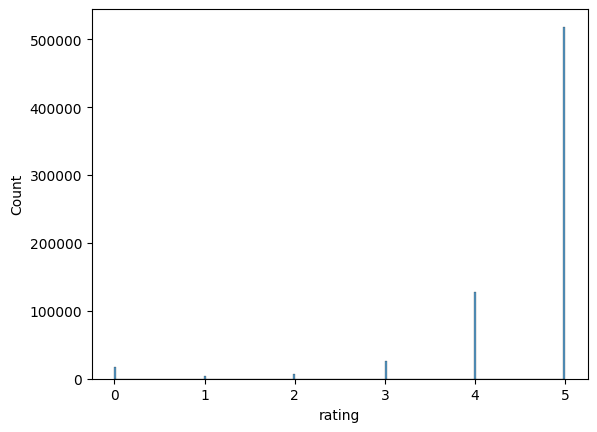

In [120]:
sns.histplot(data=df_train['rating'])

### TEST DATASET

In [121]:
df_test = pd.read_csv('interactions_test.csv')

### CODE

In [122]:
# ratingsTrain = df_train.to_dict(orient='records')
# ratingsPerUser = defaultdict(list)
# ratingsPerItem = defaultdict(list)
# for _, _, date, rating, u, i in ratingsTrain:
#     ratingsPerUser[u].append((i,rating))
#     ratingsPerItem[i].append((u,rating))

# reader = Reader(line_format='user item rating', sep=',', rating_scale=(0, 5), skip_lines=1)

In [123]:
df_train = df_train[['rating', 'u', 'i']]
df_train.head()

,rating,u,i
0,5.0,22095,44367
1,5.0,22095,87844
2,5.0,24732,138181
3,4.0,24732,93054
4,5.0,22095,101723


In [130]:
df_train['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0         5.0
1         5.0
2         5.0
3         4.0
4         5.0
         ... 
698896    5.0
698897    5.0
698898    5.0
698899    5.0
698900    5.0
Name: rating, Length: 698901, dtype: float64>

In [ ]:
reader = Reader(rating_scale=(0, 5))

data = Dataset.load_from_df(df_train, reader=reader)

trainset = data.build_full_trainset()

model = SVD(reg_all=0.275, n_factors=50, n_epochs=40)

model.fit(trainset)

In [125]:
test = df_test.to_dict(orient='records')
preds = []
y_true = []
for x in test:
    preds.append(model.predict(x['u'], x['i']).est)
    y_true.append(x['rating'])

In [126]:
preddf = pd.DataFrame(preds)
preddf.value_counts()

0
4    12455
Name: count, dtype: int64

In [127]:
mse = mean_squared_error(y_pred=preds, y_true=y_true)
mse

1.8368526696105982